In [52]:
%matplotlib inline
import mglearn
import numpy as np
from scipy import sparse
import matplotlib.pyplot as plt
import pandas as pd

In [53]:
X, y = mglearn.datasets.make_forge()

/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


Text(0,0.5,'Second feature')

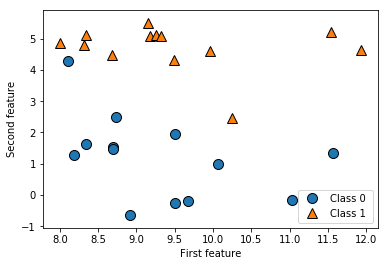

In [54]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0 ", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")

In [55]:
X.shape

(26, 2)

Text(0,0.5,'Target')

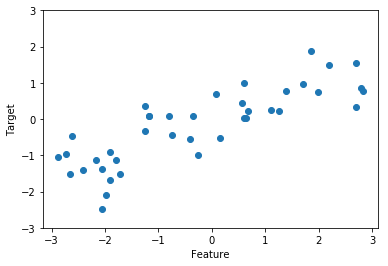

In [56]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")

In [57]:
from sklearn.datasets import load_breast_cancer

In [58]:
cancer = load_breast_cancer()

In [59]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [60]:
cancer["data"].shape

(569, 30)

In [61]:
classes = {n: v for n, v in zip(cancer["target_names"], np.bincount(cancer.target))}

In [62]:
classes

{'malignant': 212, 'benign': 357}

In [63]:
from sklearn.datasets import load_boston

In [64]:
boston = load_boston()

In [66]:
boston.data.shape

(506, 13)

/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


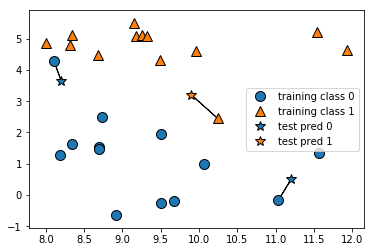

In [76]:
# mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
mglearn.plots.plot_knn_classification(n_neighbors=1)

/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


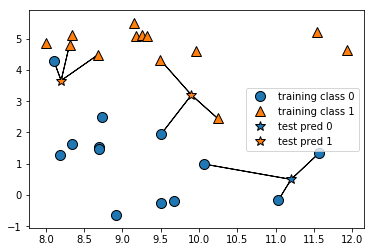

In [77]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [78]:
from sklearn.model_selection import train_test_split

In [81]:
X, y = mglearn.datasets.make_forge()
X_train, X_test, Y_train, Y_test = train_test_split(X, y, random_state=0)

/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


In [86]:
from sklearn.neighbors import KNeighborsClassifier

In [99]:
knn_clf = KNeighborsClassifier(n_neighbors=1)

In [100]:
knn_clf.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [101]:
knn_clf.score(X_test, Y_test)

0.8571428571428571

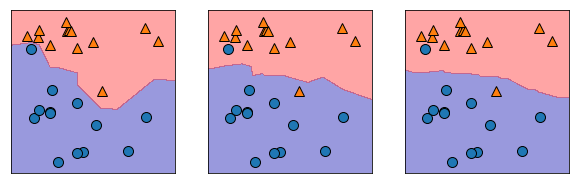

In [107]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))
for n_neighbors, ax in zip([1, 3, 9], axes):
    knn_clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(knn_clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)


In [109]:
from sklearn.datasets import load_breast_cancer

In [111]:
cancer = load_breast_cancer()
X_train, X_test, Y_train, Y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=60)

In [112]:
training_accuracy = []
test_accuracy = []
neighbors_settings = range(1, 11)

In [120]:
for n in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n)
    clf.fit(X_train, Y_train)
    training_accuracy.append(clf.score(X_train, Y_train))
    test_accuracy.append(clf.score(X_test, Y_test))
# plt.plot(neighbors_settings, training_accuracy, label="training_accuracy")
# plt.plot(neighbors_settings, test_accuracy, label="test_accuracy")
# plt.ylabel("Accuracy")
# plt.xlabel("n_neighbors")
# plt.legend()

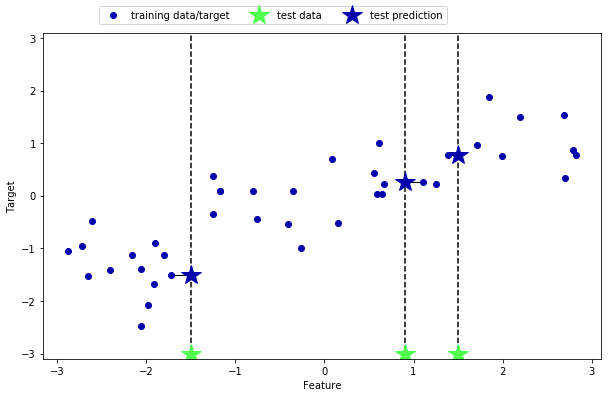

In [121]:
# Regrassion
mglearn.plots.plot_knn_regression(n_neighbors=1)

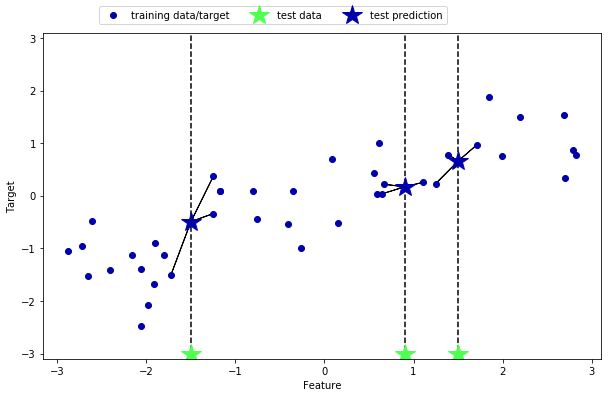

In [122]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [123]:
from sklearn.neighbors import KNeighborsRegressor

In [126]:
X, y = mglearn.datasets.make_wave(n_samples=40)
X_train, X_test, Y_train, Y_test = train_test_split(X, y, random_state=0)
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, Y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=3, p=2,
          weights='uniform')

In [127]:
reg.score(X_test, Y_test)

0.83441724462496036

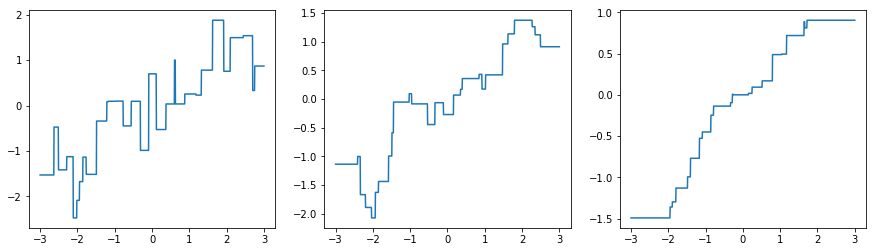

In [129]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n, ax in zip([1, 3, 9], axes):
    reg = KNeighborsRegressor(n_neighbors=n)
    reg.fit(X_train, Y_train)
    ax.plot(line, reg.predict(line))

w[0]: 0.393906  b: -0.031804


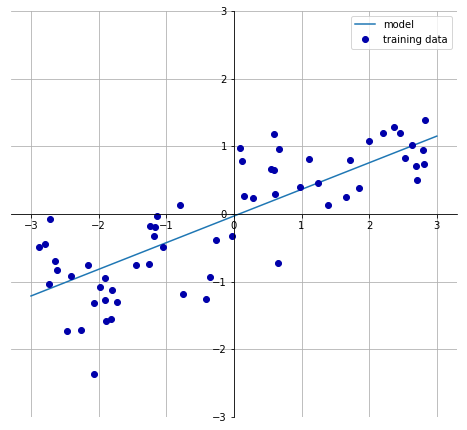

In [130]:
mglearn.plots.plot_linear_regression_wave()